# Description: 


Uncover the factors that lead to employee attrition and explore important questions such as ‘show me a breakdown of distance from home by job role and attrition’ or ‘compare average monthly income by education and attrition’. This is a fictional data set created by IBM data scientists.

# Tasks:
* Finds out factors which affects emp attition 
* Find out factors on which affecting factors are depends. 
* Use Statistical tools to prove inference. 


In [104]:
import pandas as pd
import pandas.util.testing as tm
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import pyplot as plt
import seaborn as sns
%matplotlib inline 
sns.set(color_codes=True)
plt.style.use('seaborn')

import plotly.offline as py
import plotly.graph_objs as go
from plotly.offline import init_notebook_mode
init_notebook_mode(connected=True)
from plotly import tools
from sklearn.preprocessing import LabelEncoder
from sklearn import preprocessing
le = preprocessing.LabelEncoder()

In [2]:
data = pd.read_csv("IBM_hr_data_attrition.csv")
data.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,...,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,...,4,80,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,...,2,80,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,...,3,80,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,...,4,80,1,6,3,3,2,2,2,2


In [3]:
#Shape(size of the dataset)
data.shape

(1470, 35)

In [4]:
data.columns

Index(['Age', 'Attrition', 'BusinessTravel', 'DailyRate', 'Department',
       'DistanceFromHome', 'Education', 'EducationField', 'EmployeeCount',
       'EmployeeNumber', 'EnvironmentSatisfaction', 'Gender', 'HourlyRate',
       'JobInvolvement', 'JobLevel', 'JobRole', 'JobSatisfaction',
       'MaritalStatus', 'MonthlyIncome', 'MonthlyRate', 'NumCompaniesWorked',
       'Over18', 'OverTime', 'PercentSalaryHike', 'PerformanceRating',
       'RelationshipSatisfaction', 'StandardHours', 'StockOptionLevel',
       'TotalWorkingYears', 'TrainingTimesLastYear', 'WorkLifeBalance',
       'YearsAtCompany', 'YearsInCurrentRole', 'YearsSinceLastPromotion',
       'YearsWithCurrManager'],
      dtype='object')

In [5]:
#Dropping some unnecassary features
data = data.drop(['DailyRate','EmployeeNumber','EnvironmentSatisfaction','JobInvolvement','JobSatisfaction','MonthlyRate','Over18','PerformanceRating','RelationshipSatisfaction','StockOptionLevel'], axis =1)
data.head()

,Age,Attrition,BusinessTravel,Department,DistanceFromHome,Education,EducationField,EmployeeCount,Gender,HourlyRate,...,OverTime,PercentSalaryHike,StandardHours,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,Sales,1,2,Life Sciences,1,Female,94,...,Yes,11,80,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,Research & Development,8,1,Life Sciences,1,Male,61,...,No,23,80,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,Research & Development,2,2,Other,1,Male,92,...,Yes,15,80,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,Research & Development,3,4,Life Sciences,1,Female,56,...,Yes,11,80,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,Research & Development,2,1,Medical,1,Male,40,...,No,12,80,6,3,3,2,2,2,2


Dataset has 1470 rows and 35 columns

In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 25 columns):
 #   Column                   Non-Null Count  Dtype 
---  ------                   --------------  ----- 
 0   Age                      1470 non-null   int64 
 1   Attrition                1470 non-null   object
 2   BusinessTravel           1470 non-null   object
 3   Department               1470 non-null   object
 4   DistanceFromHome         1470 non-null   int64 
 5   Education                1470 non-null   int64 
 6   EducationField           1470 non-null   object
 7   EmployeeCount            1470 non-null   int64 
 8   Gender                   1470 non-null   object
 9   HourlyRate               1470 non-null   int64 
 10  JobLevel                 1470 non-null   int64 
 11  JobRole                  1470 non-null   object
 12  MaritalStatus            1470 non-null   object
 13  MonthlyIncome            1470 non-null   int64 
 14  NumCompaniesWorked       1470 non-null  

 No null values in the dataset that's great

In [7]:
from pandas_profiling import ProfileReport

In [8]:
#report = ProfileReport(data, title = 'Pandas_profiling', explorative = True)

In [9]:
#report.to_file("widgets.html")

In [10]:
data.describe()

,Age,DistanceFromHome,Education,EmployeeCount,HourlyRate,JobLevel,MonthlyIncome,NumCompaniesWorked,PercentSalaryHike,StandardHours,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
count,1470.000000,1470.000000,1470.000000,1470.0,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.0,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000
mean,36.923810,9.192517,2.912925,1.0,65.891156,2.063946,6502.931293,2.693197,15.209524,80.0,11.279592,2.799320,2.761224,7.008163,4.229252,2.187755,4.123129
std,9.135373,8.106864,1.024165,0.0,20.329428,1.106940,4707.956783,2.498009,3.659938,0.0,7.780782,1.289271,0.706476,6.126525,3.623137,3.222430,3.568136
min,18.000000,1.000000,1.000000,1.0,30.000000,1.000000,1009.000000,0.000000,11.000000,80.0,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,30.000000,2.000000,2.000000,1.0,48.000000,1.000000,2911.000000,1.000000,12.000000,80.0,6.000000,2.000000,2.000000,3.000000,2.000000,0.000000,2.000000
50%,36.000000,7.000000,3.000000,1.0,66.000000,2.000000,4919.000000,2.000000,14.000000,80.0,10.000000,3.000000,3.000000,5.000000,3.000000,1.000000,3.000000
75%,43.000000,14.000000,4.000000,1.0,83.750000,3.000000,8379.000000,4.000000,18.000000,80.0,15.000000,3.000000,3.000000,9.000000,7.000000,3.000000,7.000000
max,60.000000,29.000000,5.000000,1.0,100.000000,5.000000,19999.000000,9.000000,25.000000,80.0,40.000000,6.000000,4.000000,40.000000,18.000000,15.000000,17.000000


In [11]:
print(data.nunique())

Age                          43
Attrition                     2
BusinessTravel                3
Department                    3
DistanceFromHome             29
Education                     5
EducationField                6
EmployeeCount                 1
Gender                        2
HourlyRate                   71
JobLevel                      5
JobRole                       9
MaritalStatus                 3
MonthlyIncome              1349
NumCompaniesWorked           10
OverTime                      2
PercentSalaryHike            15
StandardHours                 1
TotalWorkingYears            40
TrainingTimesLastYear         7
WorkLifeBalance               4
YearsAtCompany               37
YearsInCurrentRole           19
YearsSinceLastPromotion      16
YearsWithCurrManager         18
dtype: int64


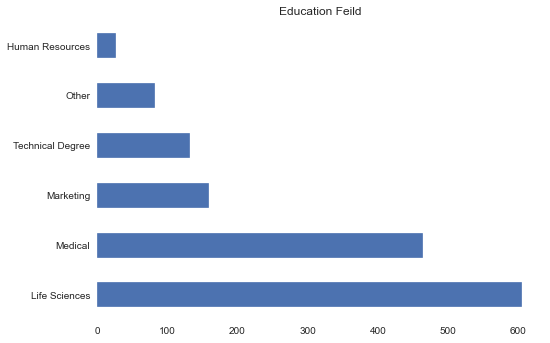

In [12]:
#Educational qualification
data['EducationField'].value_counts().plot.barh(title='Education Feild')

The maaximum employees have 3rd category of education, This might be bachelors.


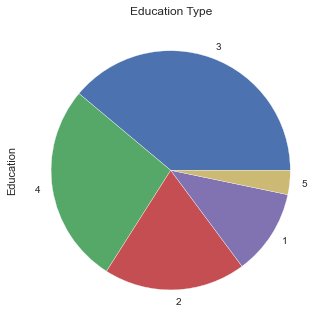

In [13]:
#Educational qualification
data['Education'].value_counts().plot.pie(title='Education Type')

In [14]:
data['Attrition'] = data['Attrition'].map({ 
    'No': 0, 
    'Yes': 1
}.get)
data.head()

,Age,Attrition,BusinessTravel,Department,DistanceFromHome,Education,EducationField,EmployeeCount,Gender,HourlyRate,...,OverTime,PercentSalaryHike,StandardHours,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,1,Travel_Rarely,Sales,1,2,Life Sciences,1,Female,94,...,Yes,11,80,8,0,1,6,4,0,5
1,49,0,Travel_Frequently,Research & Development,8,1,Life Sciences,1,Male,61,...,No,23,80,10,3,3,10,7,1,7
2,37,1,Travel_Rarely,Research & Development,2,2,Other,1,Male,92,...,Yes,15,80,7,3,3,0,0,0,0
3,33,0,Travel_Frequently,Research & Development,3,4,Life Sciences,1,Female,56,...,Yes,11,80,8,3,3,8,7,3,0
4,27,0,Travel_Rarely,Research & Development,2,1,Medical,1,Male,40,...,No,12,80,6,3,3,2,2,2,2


In [15]:
data['Gender'] = data['Gender'].map({ 
    'Male': 0, 
    'Female': 1
}.get)
data.head()

,Age,Attrition,BusinessTravel,Department,DistanceFromHome,Education,EducationField,EmployeeCount,Gender,HourlyRate,...,OverTime,PercentSalaryHike,StandardHours,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,1,Travel_Rarely,Sales,1,2,Life Sciences,1,1,94,...,Yes,11,80,8,0,1,6,4,0,5
1,49,0,Travel_Frequently,Research & Development,8,1,Life Sciences,1,0,61,...,No,23,80,10,3,3,10,7,1,7
2,37,1,Travel_Rarely,Research & Development,2,2,Other,1,0,92,...,Yes,15,80,7,3,3,0,0,0,0
3,33,0,Travel_Frequently,Research & Development,3,4,Life Sciences,1,1,56,...,Yes,11,80,8,3,3,8,7,3,0
4,27,0,Travel_Rarely,Research & Development,2,1,Medical,1,0,40,...,No,12,80,6,3,3,2,2,2,2


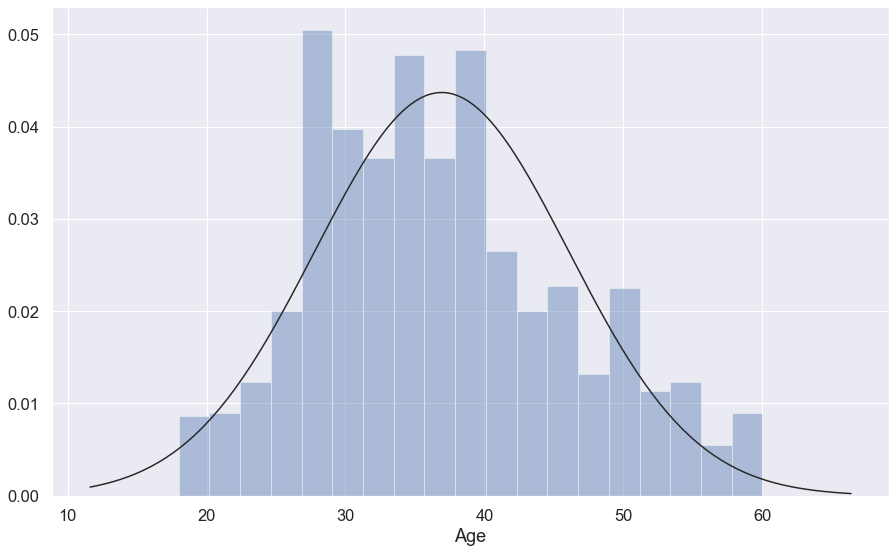

In [16]:
#Age range
sns.set(font_scale=1.5) 
from scipy.stats import norm
fig, ax = plt.subplots(figsize=(15, 9))
sns.distplot(a=data.Age, kde=False, fit=norm)

Age is normally distrubuted, most of the employees are aged around 30 - 40

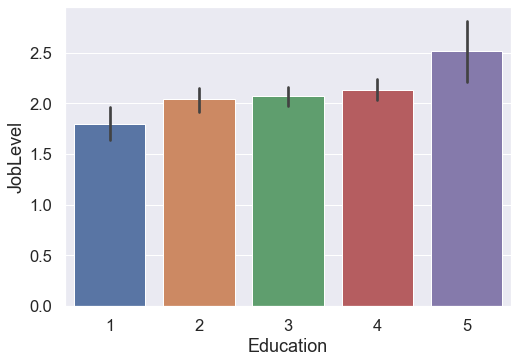

In [17]:
#education vs jobLevel
sns.barplot(x="Education", y="JobLevel", data=data);

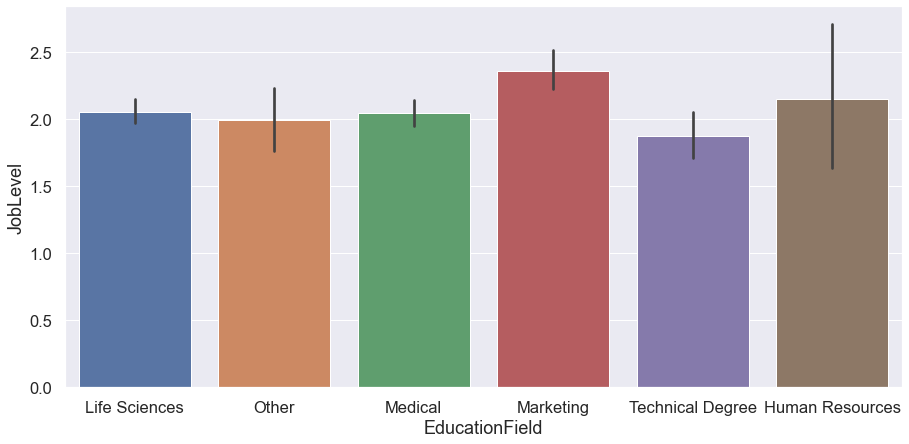

In [18]:
#educationfeild vs jobLevel
plt.figure(figsize=(15, 7))
sns.barplot(x="EducationField", y="JobLevel", data=data);

As per above plot  most of employees are from marketing field

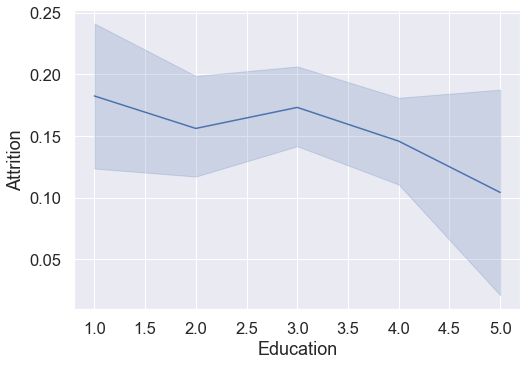

In [19]:
#education vs jobLevel
sns.lineplot(x="Education", y="Attrition", data=data);

In [20]:
#sns.lineplot(x = 'Salary', y = 'Education', data = data)

* As per the above plot the education level affects the job level
* let me see if the job level affects the attrition
 

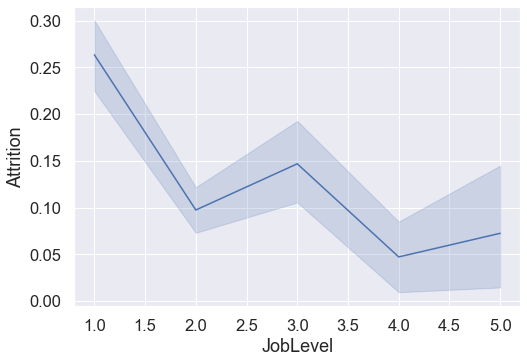

In [21]:
#education vs jobLevel
sns.lineplot(x="JobLevel", y="Attrition", data=data);

By seeing the above plot it is clear that joblevel affects the attrition
* Job level1 has maximum attrition
* Job level5 has minimum attrition

In [22]:
table = pd.pivot_table(data=data,index='Department',values='EmployeeCount',aggfunc=np.sum)
table

,EmployeeCount
Department,
Human Resources,63
Research & Development,961
Sales,446


* So R and D has maximum number of employees
* now let me see does the department affect the attrition


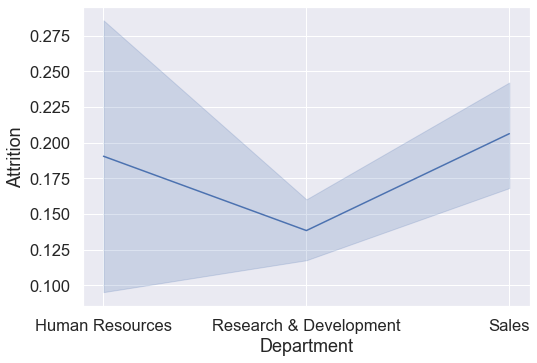

In [23]:
#attrition vs dept
sns.lineplot(x="Department", y="Attrition", data=data);

* So here R and D has less attrition and sales department has maximum attrition
* Let me see the reason for high attrition in Sales and HR dept


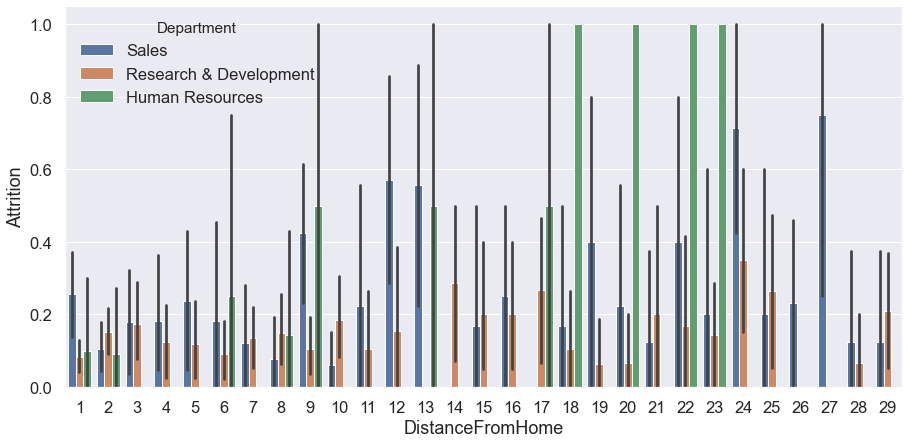

In [24]:
#attrition vs dept
plt.figure(figsize=(15, 7))
sns.barplot(x="DistanceFromHome", y="Attrition",hue = 'Department' ,data=data);

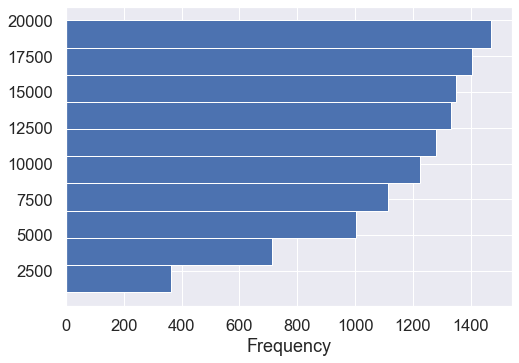

In [25]:
 data['MonthlyIncome'].plot.hist(orientation='horizontal', cumulative=True)

So here the distance may be the reason for attrition but not for all

In [26]:
data["MonthlyIncome"] = data["MonthlyIncome"].astype(int,copy=True)

In [27]:
bins = np.linspace(min(data["MonthlyIncome"]),max(data["MonthlyIncome"]),4)
bins

array([ 1009.,  7339., 13669., 19999.])

In [28]:
group_names = ['Low', 'Medium', 'High']

In [29]:
data['Salary'] = pd.cut(data['MonthlyIncome'], bins, labels=group_names ,include_lowest = True)
data[['MonthlyIncome','Salary']].head(20)

,MonthlyIncome,Salary
0,5993,Low
1,5130,Low
2,2090,Low
3,2909,Low
4,3468,Low
5,3068,Low
6,2670,Low
7,2693,Low
8,9526,Medium
9,5237,Low


Text(0.5, 1.0, 'Salary')

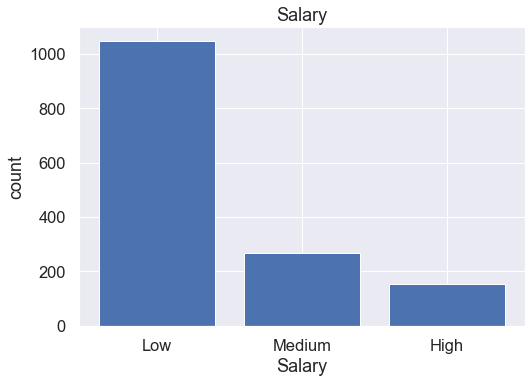

In [30]:
import matplotlib as plt
from matplotlib import pyplot
pyplot.bar(group_names, data["Salary"].value_counts())

# set x/y labels and plot title
plt.pyplot.xlabel("Salary")
plt.pyplot.ylabel("count")
plt.pyplot.title("Salary")

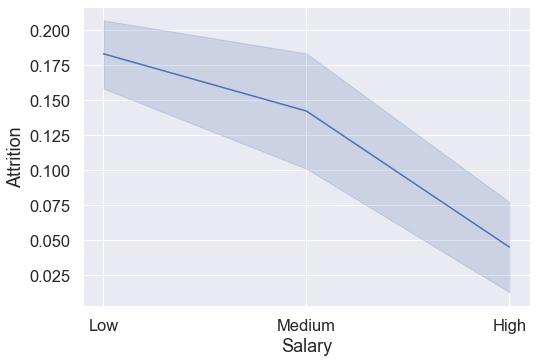

In [31]:
#Salary vs attrition
sns.lineplot(x="Salary", y="Attrition", data=data);

So Salary is a factor that highly affects the attrition

* now let me see the salaries for the departments

In [32]:
#data['Department'] = data['Department'].map({ 
    #'Sales': 1, 
    #'Research & Development': 2, 'Human Resources': 3
#}.get)
#data.head()

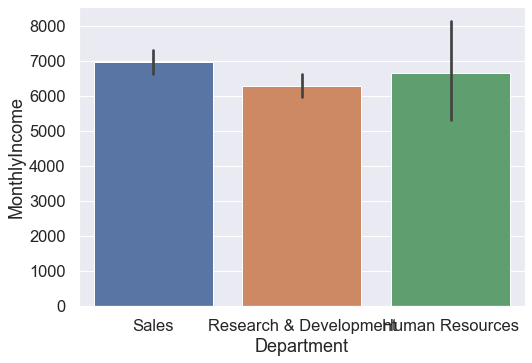

In [33]:
#dept vs income
sns.barplot(x="Department", y="MonthlyIncome", data=data);

even though R and D has less income compared to Sales and Hr dept attrititon is less

<Figure size 720x720 with 0 Axes>

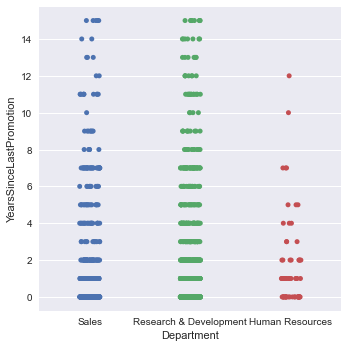

In [36]:
plt.figure(figsize=(10,10))
sns.catplot(x = 'Department', y = 'YearsSinceLastPromotion', data = data)

So promotion may be the possible reason for attrition as hr dept has less promotion and more attrition

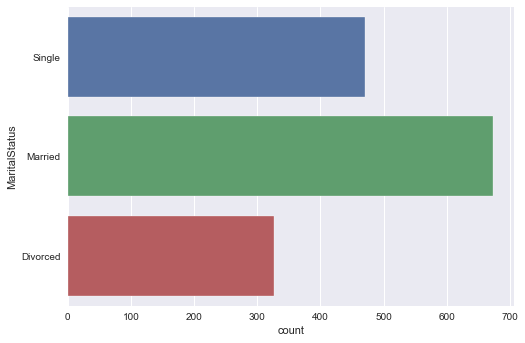

In [37]:
sns.countplot(y='MaritalStatus', data=data)

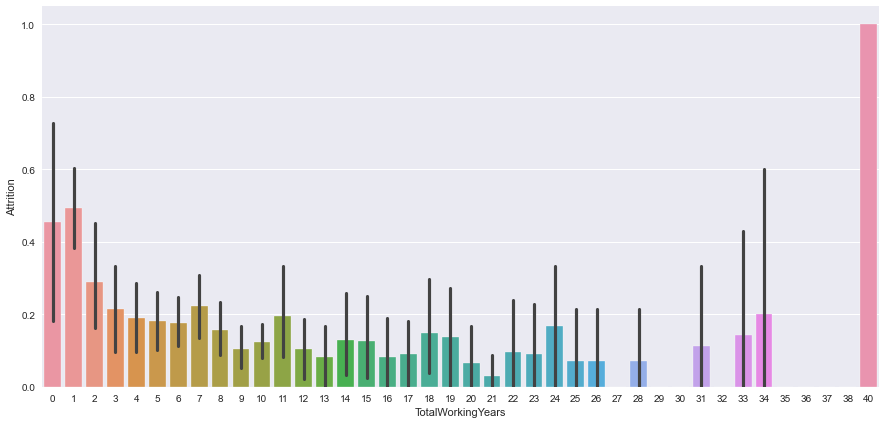

In [38]:
plt.figure(figsize=(15, 7))
sns.barplot(x = 'TotalWorkingYears', y = 'Attrition', data = data)

Looks like some outliers are present, let me check

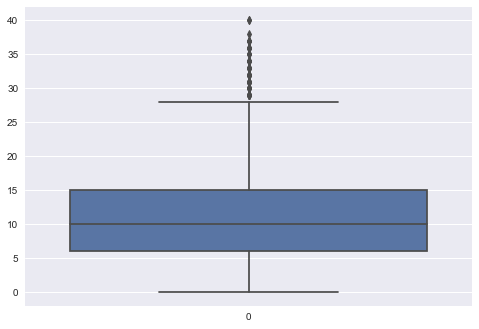

In [39]:
sns.boxplot(data = data['TotalWorkingYears'])

In [40]:
print(data['TotalWorkingYears'].quantile(0.5))
print(data['TotalWorkingYears'].quantile(0.95))

10.0
28.0


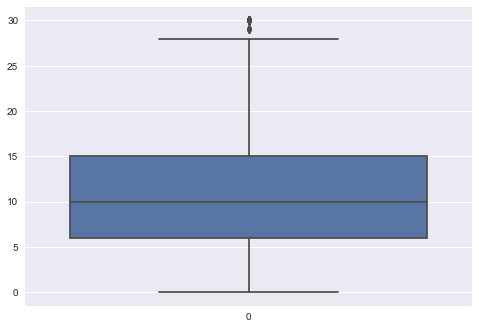

In [41]:
data["TotalWorkingYears"] = np.where(data["TotalWorkingYears"] <0.0, 0.0,data['TotalWorkingYears'])
data["TotalWorkingYears"] = np.where(data["TotalWorkingYears"] >30.0, 30.0,data['TotalWorkingYears'])
sns.boxplot(data = data['TotalWorkingYears'])

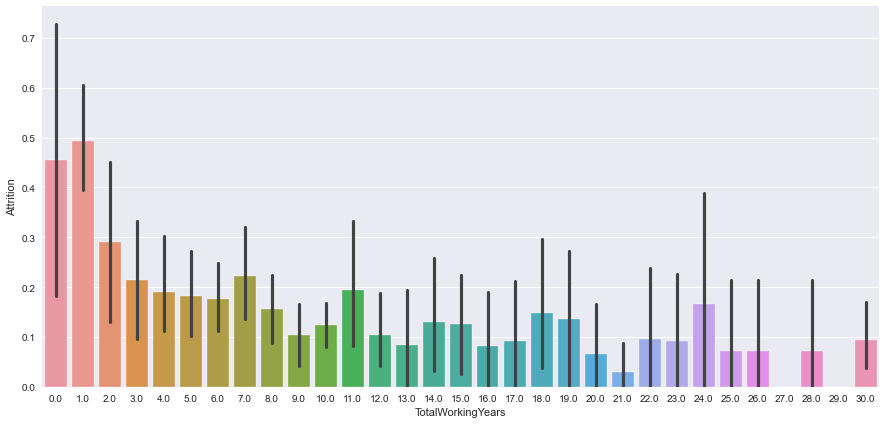

In [42]:
#Totalyears(Experience) vs Attrition
plt.figure(figsize=(15, 7))
sns.barplot(x = 'TotalWorkingYears', y = 'Attrition', data = data)

As per the above plot, employees working for longer period in the company are less likely to attrite. The reason for this may be due to high salary

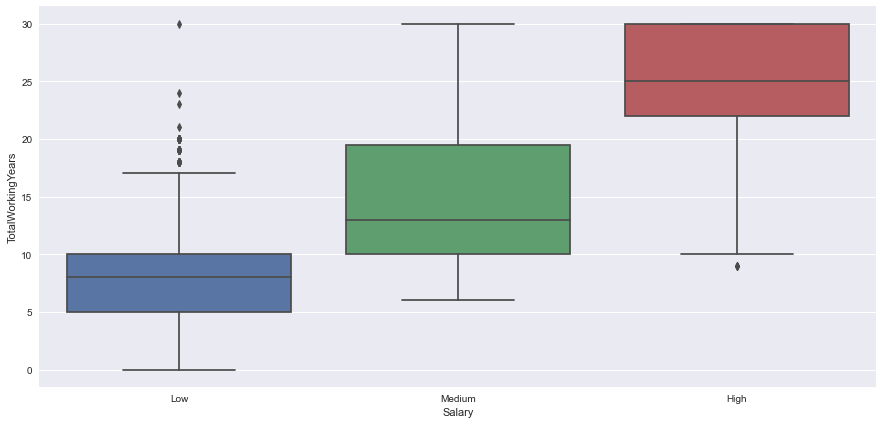

In [43]:
#Salary vs Years
plt.figure(figsize=(15, 7))
sns.boxplot(x = 'Salary', y = 'TotalWorkingYears', data = data)

its clear that as the salary increases with the experience, hence the employee are less likely to attrite

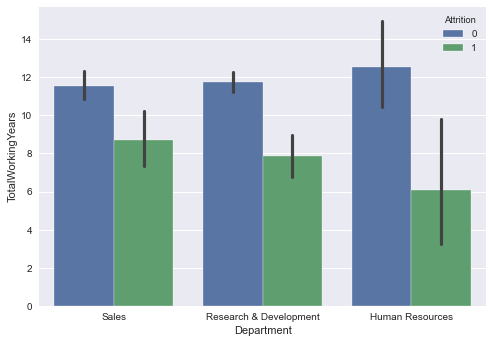

In [44]:
sns.barplot(x = 'Department', y = 'TotalWorkingYears', hue = 'Attrition', data = data)

In [45]:
import plotly.offline as py
import plotly.graph_objs as go
from plotly.offline import init_notebook_mode
init_notebook_mode(connected=True)
from plotly import tools

In [46]:
Type=data.groupby('Department')['Gender'].agg('count')

values=[Type['Sales'],Type['Research & Development'],Type['Human Resources']]
labels=['Sales','R & D', 'HR']

trace=go.Pie(labels=labels,values=values)
py.iplot([trace])

In [47]:
data.columns

Index(['Age', 'Attrition', 'BusinessTravel', 'Department', 'DistanceFromHome',
       'Education', 'EducationField', 'EmployeeCount', 'Gender', 'HourlyRate',
       'JobLevel', 'JobRole', 'MaritalStatus', 'MonthlyIncome',
       'NumCompaniesWorked', 'OverTime', 'PercentSalaryHike', 'StandardHours',
       'TotalWorkingYears', 'TrainingTimesLastYear', 'WorkLifeBalance',
       'YearsAtCompany', 'YearsInCurrentRole', 'YearsSinceLastPromotion',
       'YearsWithCurrManager', 'Salary'],
      dtype='object')

In [48]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 26 columns):
 #   Column                   Non-Null Count  Dtype   
---  ------                   --------------  -----   
 0   Age                      1470 non-null   int64   
 1   Attrition                1470 non-null   int64   
 2   BusinessTravel           1470 non-null   object  
 3   Department               1470 non-null   object  
 4   DistanceFromHome         1470 non-null   int64   
 5   Education                1470 non-null   int64   
 6   EducationField           1470 non-null   object  
 7   EmployeeCount            1470 non-null   int64   
 8   Gender                   1470 non-null   int64   
 9   HourlyRate               1470 non-null   int64   
 10  JobLevel                 1470 non-null   int64   
 11  JobRole                  1470 non-null   object  
 12  MaritalStatus            1470 non-null   object  
 13  MonthlyIncome            1470 non-null   int32   
 14  NumCompa

# Treating categorical data

In [49]:
le = preprocessing.LabelEncoder()

In [50]:
data. BusinessTravel  = le.fit_transform(data. BusinessTravel )
data.Department   = le.fit_transform(data.Department)
data.EducationField = le.fit_transform(data.EducationField)
data.JobRole = le.fit_transform(data.JobRole)
data.MaritalStatus = le.fit_transform(data.MaritalStatus)
data.OverTime = le.fit_transform(data.OverTime)
data.Salary = le.fit_transform(data.Salary)
data.head()

,Age,Attrition,BusinessTravel,Department,DistanceFromHome,Education,EducationField,EmployeeCount,Gender,HourlyRate,...,PercentSalaryHike,StandardHours,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager,Salary
0,41,1,2,2,1,2,1,1,1,94,...,11,80,8.0,0,1,6,4,0,5,1
1,49,0,1,1,8,1,1,1,0,61,...,23,80,10.0,3,3,10,7,1,7,1
2,37,1,2,1,2,2,4,1,0,92,...,15,80,7.0,3,3,0,0,0,0,1
3,33,0,1,1,3,4,1,1,1,56,...,11,80,8.0,3,3,8,7,3,0,1
4,27,0,2,1,2,1,3,1,0,40,...,12,80,6.0,3,3,2,2,2,2,1


In [51]:
data.describe()

,Age,Attrition,BusinessTravel,Department,DistanceFromHome,Education,EducationField,EmployeeCount,Gender,HourlyRate,...,PercentSalaryHike,StandardHours,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager,Salary
count,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.0,1470.000000,1470.000000,...,1470.000000,1470.0,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000
mean,36.923810,0.161224,1.607483,1.260544,9.192517,2.912925,2.247619,1.0,0.400000,65.891156,...,15.209524,80.0,11.160544,2.799320,2.761224,7.008163,4.229252,2.187755,4.123129,1.076190
std,9.135373,0.367863,0.665455,0.527792,8.106864,1.024165,1.331369,0.0,0.490065,20.329428,...,3.659938,0.0,7.444924,1.289271,0.706476,6.126525,3.623137,3.222430,3.568136,0.530529
min,18.000000,0.000000,0.000000,0.000000,1.000000,1.000000,0.000000,1.0,0.000000,30.000000,...,11.000000,80.0,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,30.000000,0.000000,1.000000,1.000000,2.000000,2.000000,1.000000,1.0,0.000000,48.000000,...,12.000000,80.0,6.000000,2.000000,2.000000,3.000000,2.000000,0.000000,2.000000,1.000000
50%,36.000000,0.000000,2.000000,1.000000,7.000000,3.000000,2.000000,1.0,0.000000,66.000000,...,14.000000,80.0,10.000000,3.000000,3.000000,5.000000,3.000000,1.000000,3.000000,1.000000
75%,43.000000,0.000000,2.000000,2.000000,14.000000,4.000000,3.000000,1.0,1.000000,83.750000,...,18.000000,80.0,15.000000,3.000000,3.000000,9.000000,7.000000,3.000000,7.000000,1.000000
max,60.000000,1.000000,2.000000,2.000000,29.000000,5.000000,5.000000,1.0,1.000000,100.000000,...,25.000000,80.0,30.000000,6.000000,4.000000,40.000000,18.000000,15.000000,17.000000,2.000000


In [52]:
list(set(data.dtypes.tolist()))

[dtype('int64'), dtype('int32'), dtype('float64')]

In [53]:
data_num = data.select_dtypes(include = ['float64', 'int64', 'int32'])
data_num.head()

,Age,Attrition,BusinessTravel,Department,DistanceFromHome,Education,EducationField,EmployeeCount,Gender,HourlyRate,...,PercentSalaryHike,StandardHours,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager,Salary
0,41,1,2,2,1,2,1,1,1,94,...,11,80,8.0,0,1,6,4,0,5,1
1,49,0,1,1,8,1,1,1,0,61,...,23,80,10.0,3,3,10,7,1,7,1
2,37,1,2,1,2,2,4,1,0,92,...,15,80,7.0,3,3,0,0,0,0,1
3,33,0,1,1,3,4,1,1,1,56,...,11,80,8.0,3,3,8,7,3,0,1
4,27,0,2,1,2,1,3,1,0,40,...,12,80,6.0,3,3,2,2,2,2,1


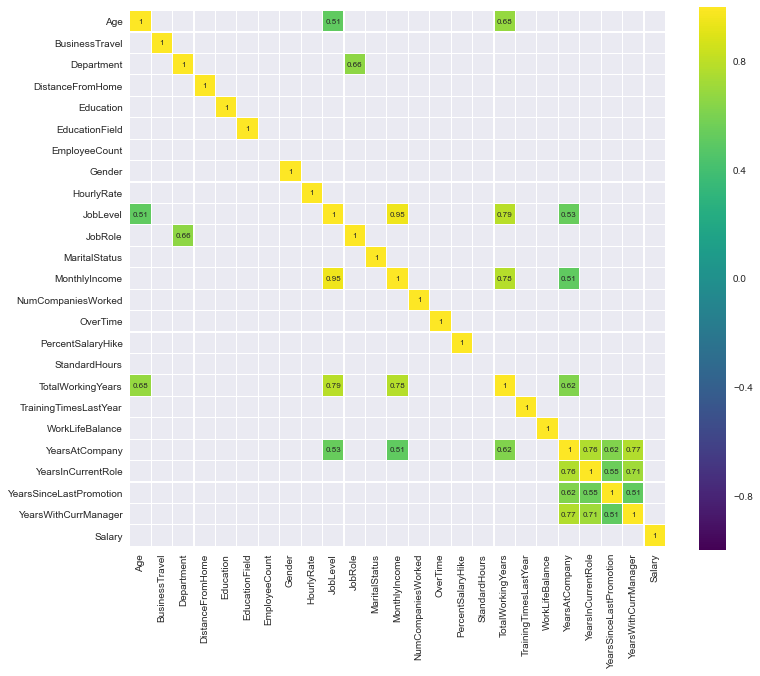

In [54]:
corr = data_num.drop('Attrition', axis=1).corr()
plt.figure(figsize=(12, 10))

sns.heatmap(corr[(corr >= 0.5) | (corr <= -0.4)], 
            cmap='viridis', vmax=1.0, vmin=-1.0, linewidths=0.1,
            annot=True, annot_kws={"size": 8}, square=True);

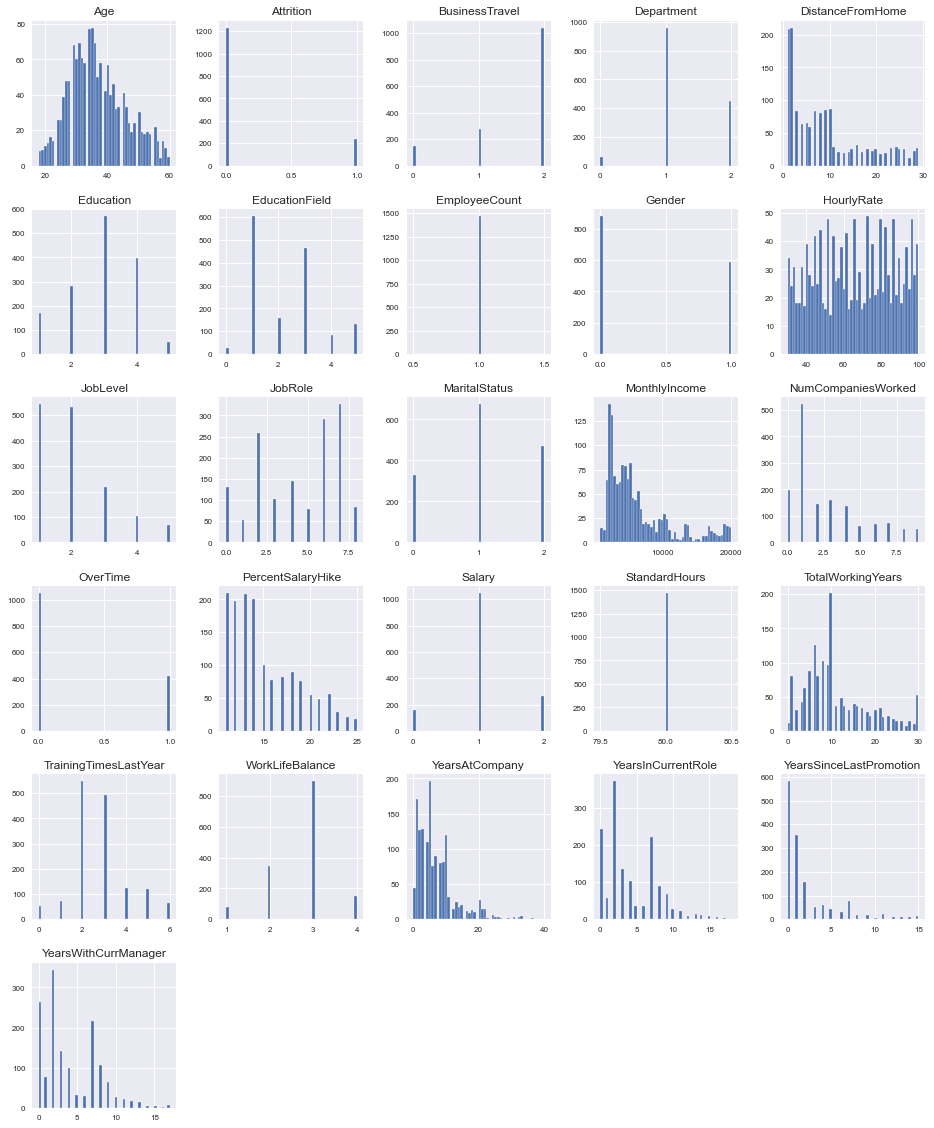

In [55]:
data_num.hist(figsize=(16, 20), bins=50, xlabelsize=8, ylabelsize=8); # ; avoid having the matplotlib verbose informations

* Their are some skewed columns in the dataset, i will use log10 transformation to get normal distribution
* This will give normal distribution as well as, it will treat outliers

In [70]:
data['DistanceFromHome'] = np.log10(data['DistanceFromHome'])
data['HourlyRate'] = np.log(data['HourlyRate'])
data['PercentSalaryHike'] = np.log10(data['PercentSalaryHike'])



# outlier treatment

In [71]:
data['YearsAtCompany'].describe()

count    1470.000000
mean        7.008163
std         6.126525
min         0.000000
25%         3.000000
50%         5.000000
75%         9.000000
max        40.000000
Name: YearsAtCompany, dtype: float64

In [77]:
data['YearsInCurrentRole'].describe()

count    1470.000000
mean        4.229252
std         3.623137
min         0.000000
25%         2.000000
50%         3.000000
75%         7.000000
max        18.000000
Name: YearsInCurrentRole, dtype: float64

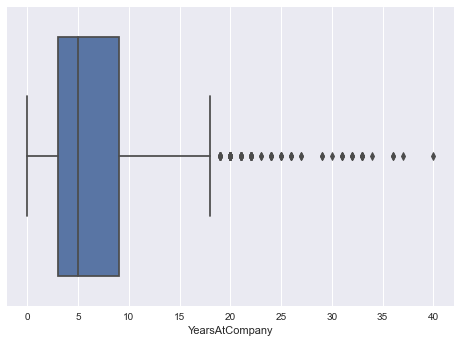

In [72]:
sns.boxplot(data['YearsAtCompany'])

In [73]:
print(data['YearsAtCompany'].quantile(0.5))
print(data['YearsAtCompany'].quantile(0.95))

5.0
20.0


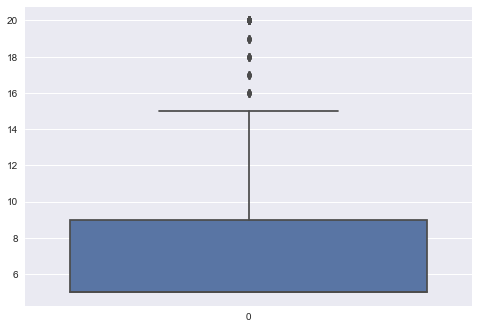

In [76]:
data["YearsAtCompany"] = np.where(data["YearsAtCompany"] <5.0, 5.0,data['YearsAtCompany'])
data["YearsAtCompany"] = np.where(data["YearsAtCompany"] >20.0, 20.0,data['YearsAtCompany'])
sns.boxplot(data = data['YearsAtCompany'])

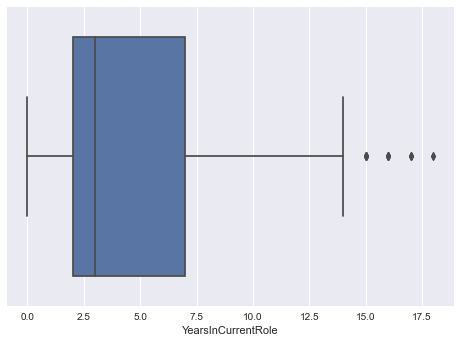

In [78]:
sns.boxplot(data['YearsInCurrentRole'])

In [82]:
print(data['YearsInCurrentRole'].quantile(0.5))
print(data['YearsInCurrentRole'].quantile(0.95))

5.0
7.0


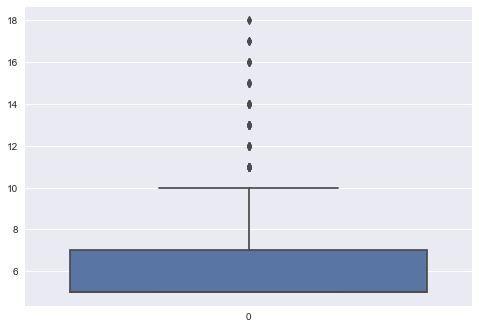

In [81]:
data["YearsInCurrentRole"] = np.where(data["YearsInCurrentRole"] <5.0, 5.0,data['YearsInCurrentRole'])
data["YearsInCurrentRole"] = np.where(data["YearsInCurrentRole"] >20.0, 20.0,data['YearsInCurrentRole'])
sns.boxplot(data = data['YearsInCurrentRole'])

In [88]:
data.describe()

,Age,Attrition,BusinessTravel,Department,DistanceFromHome,Education,EducationField,EmployeeCount,Gender,HourlyRate,...,PercentSalaryHike,StandardHours,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager,Salary
count,1470.000000,1470.000000,1470.000000,1470.000000,0.0,1470.000000,1470.000000,1470.0,1470.000000,0.0,...,0.0,1470.0,1459.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000
mean,36.923810,0.161224,1.607483,1.260544,NaN,2.912925,2.247619,1.0,0.400000,NaN,...,NaN,80.0,-inf,2.799320,2.761224,7.874830,6.227891,2.187755,4.123129,1.076190
std,9.135373,0.367863,0.665455,0.527792,NaN,1.024165,1.331369,0.0,0.490065,NaN,...,NaN,0.0,NaN,1.289271,0.706476,4.379618,2.173022,3.222430,3.568136,0.530529
min,18.000000,0.000000,0.000000,0.000000,NaN,1.000000,0.000000,1.0,0.000000,NaN,...,NaN,80.0,-inf,0.000000,1.000000,5.000000,5.000000,0.000000,0.000000,0.000000
25%,30.000000,0.000000,1.000000,1.000000,NaN,2.000000,1.000000,1.0,0.000000,NaN,...,NaN,80.0,-0.250834,2.000000,2.000000,5.000000,5.000000,0.000000,2.000000,1.000000
50%,36.000000,0.000000,2.000000,1.000000,NaN,3.000000,2.000000,1.0,0.000000,NaN,...,NaN,80.0,0.000000,3.000000,3.000000,5.000000,5.000000,1.000000,3.000000,1.000000
75%,43.000000,0.000000,2.000000,2.000000,NaN,4.000000,3.000000,1.0,1.000000,NaN,...,NaN,80.0,0.162196,3.000000,3.000000,9.000000,7.000000,3.000000,7.000000,1.000000
max,60.000000,1.000000,2.000000,2.000000,NaN,5.000000,5.000000,1.0,1.000000,NaN,...,NaN,80.0,0.390095,6.000000,4.000000,20.000000,18.000000,15.000000,17.000000,2.000000


In [89]:
data.columns

Index(['Age', 'Attrition', 'BusinessTravel', 'Department', 'DistanceFromHome',
       'Education', 'EducationField', 'EmployeeCount', 'Gender', 'HourlyRate',
       'JobLevel', 'JobRole', 'MaritalStatus', 'MonthlyIncome',
       'NumCompaniesWorked', 'OverTime', 'PercentSalaryHike', 'StandardHours',
       'TotalWorkingYears', 'TrainingTimesLastYear', 'WorkLifeBalance',
       'YearsAtCompany', 'YearsInCurrentRole', 'YearsSinceLastPromotion',
       'YearsWithCurrManager', 'Salary'],
      dtype='object')

In [90]:
data.drop(['MonthlyIncome'], axis =1)

,Age,Attrition,BusinessTravel,Department,DistanceFromHome,Education,EducationField,EmployeeCount,Gender,HourlyRate,...,PercentSalaryHike,StandardHours,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager,Salary
0,41,1,2,2,NaN,2,1,1,1,NaN,...,NaN,80,-0.101933,0,1,6.0,5.0,0,5,1
1,49,0,1,1,NaN,1,1,1,0,NaN,...,NaN,80,0.000000,3,3,10.0,7.0,1,7,1
2,37,1,2,1,NaN,2,4,1,0,NaN,...,NaN,80,-0.168303,3,3,5.0,5.0,0,0,1
3,33,0,1,1,NaN,4,1,1,1,NaN,...,NaN,80,-0.101933,3,3,8.0,7.0,3,0,1
4,27,0,2,1,NaN,1,3,1,0,NaN,...,NaN,80,-0.250834,3,3,5.0,5.0,2,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1465,36,0,1,1,NaN,2,3,1,0,NaN,...,NaN,80,0.207379,3,3,5.0,5.0,0,3,1
1466,39,0,2,1,NaN,1,3,1,0,NaN,...,NaN,80,-0.046837,5,3,7.0,7.0,1,7,2
1467,27,0,2,1,NaN,3,1,1,0,NaN,...,NaN,80,-0.250834,0,3,6.0,5.0,0,3,1
1468,49,0,1,2,NaN,3,3,1,0,NaN,...,NaN,80,0.207379,3,2,9.0,6.0,0,8,1


In [91]:
data.columns

Index(['Age', 'Attrition', 'BusinessTravel', 'Department', 'DistanceFromHome',
       'Education', 'EducationField', 'EmployeeCount', 'Gender', 'HourlyRate',
       'JobLevel', 'JobRole', 'MaritalStatus', 'MonthlyIncome',
       'NumCompaniesWorked', 'OverTime', 'PercentSalaryHike', 'StandardHours',
       'TotalWorkingYears', 'TrainingTimesLastYear', 'WorkLifeBalance',
       'YearsAtCompany', 'YearsInCurrentRole', 'YearsSinceLastPromotion',
       'YearsWithCurrManager', 'Salary'],
      dtype='object')

In [92]:
data.to_csv("clean.csv", index = False)

# Statistical Analysis

In [93]:
df = pd.read_csv('clean.csv')
df.columns

Index(['Age', 'Attrition', 'BusinessTravel', 'Department', 'DistanceFromHome',
       'Education', 'EducationField', 'EmployeeCount', 'Gender', 'HourlyRate',
       'JobLevel', 'JobRole', 'MaritalStatus', 'MonthlyIncome',
       'NumCompaniesWorked', 'OverTime', 'PercentSalaryHike', 'StandardHours',
       'TotalWorkingYears', 'TrainingTimesLastYear', 'WorkLifeBalance',
       'YearsAtCompany', 'YearsInCurrentRole', 'YearsSinceLastPromotion',
       'YearsWithCurrManager', 'Salary'],
      dtype='object')

In [96]:
df.dtypes

Age                          int64
Attrition                    int64
BusinessTravel               int64
Department                   int64
DistanceFromHome           float64
Education                    int64
EducationField               int64
EmployeeCount                int64
Gender                       int64
HourlyRate                 float64
JobLevel                     int64
JobRole                      int64
MaritalStatus                int64
MonthlyIncome                int64
NumCompaniesWorked           int64
OverTime                     int64
PercentSalaryHike          float64
StandardHours                int64
TotalWorkingYears          float64
TrainingTimesLastYear        int64
WorkLifeBalance              int64
YearsAtCompany             float64
YearsInCurrentRole         float64
YearsSinceLastPromotion      int64
YearsWithCurrManager         int64
Salary                       int64
dtype: object

In [108]:
df = np.nan_to_num(df)


AttributeError: 'numpy.ndarray' object has no attribute 'head'

In [106]:
from sklearn.model_selection import train_test_split
import pandas as pd
import numpy as np
from sklearn.preprocessing import LabelEncoder
from sklearn import preprocessing
from sklearn import metrics
import seaborn as sns
import matplotlib.pyplot as plt

In [107]:
X= df.drop("Attrition", axis = 1)
y = df["Attrition"]

AttributeError: 'numpy.ndarray' object has no attribute 'drop'

In [99]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

In [100]:
from sklearn.ensemble import RandomForestClassifier

In [101]:
model = RandomForestClassifier()
model.fit(X_train, y_train)

C:\Users\Md Khalid Siddique\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning:

The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.



ValueError: Input contains NaN, infinity or a value too large for dtype('float32').